### **Introdu√ß√£o**

*Imagine uma ferramenta que possa auxiliar na triagem inicial de doen√ßas com base nos sintomas apresentados por um paciente. A previs√£o de doen√ßas usando intelig√™ncia artificial √© uma abordagem que visa apoiar profissionais de sa√∫de na identifica√ß√£o precoce de poss√≠veis diagn√≥sticos, facilitando o atendimento e contribuindo para um tratamento mais r√°pido e eficaz.*

Neste projeto, nosso objetivo √© desenvolver um modelo de **deep learning** que, a partir dos sintomas relatados, forne√ßa uma previs√£o precisa do diagn√≥stico. Para isso, utilizamos a biblioteca **AutoGluon**, que nos permite criar e otimizar modelos de classifica√ß√£o com alta efici√™ncia e rapidez. Esse modelo ser√° integrado a uma interface interativa para permitir que o usu√°rio selecione sintomas e receba previs√µes instant√¢neas.

### **Objetivo do Projeto**

O objetivo principal deste projeto √© construir uma aplica√ß√£o capaz de prever doen√ßas com base em sintomas fornecidos pelo usu√°rio, com alta precis√£o. Nossa meta √© criar um modelo robusto que possa generalizar bem para diferentes casos e auxiliar na tomada de decis√µes.

### **Fonte dos Dados**

Para alimentar e treinar nosso modelo, utilizamos o dataset p√∫blico dispon√≠vel no Kaggle, intitulado ["Disease Prediction Dataset"](https://www.kaggle.com/datasets/marslinoedward/disease-prediction-data). Esse dataset cont√©m uma lista extensa de sintomas e os diagn√≥sticos associados, o que permite que nosso modelo aprenda a relacionar diferentes combina√ß√µes de sintomas a doen√ßas espec√≠ficas.



# Coleta e Carregamento dos Dados

### **Coleta e Carregamento dos Dados**

*Para construir um modelo de previs√£o de doen√ßas com base em sintomas, √© fundamental come√ßar com uma base de dados s√≥lida e confi√°vel que nos permita treinar o modelo de forma adequada. Aqui, utilizamos o dataset 'Disease Prediction Dataset' do Kaggle, que cont√©m uma variedade de sintomas e os diagn√≥sticos associados, formando a base do nosso modelo de aprendizado de m√°quina.*

### Acessando e Baixando o Dataset:



In [ ]:
import kagglehub

path = kagglehub.dataset_download("marslinoedward/disease-prediction-data")
print("Path to dataset files:", path)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 29.8k/29.8k [00:00<00:00, 34.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/marslinoedward/disease-prediction-data/versions/1


Para iniciar, utilizamos o `kagglehub` para baixar o dataset diretamente da plataforma Kaggle. Esse passo nos permite automatizar a coleta de dados e garantir que estamos trabalhando com as vers√µes mais recentes do dataset.

#### Carregando os Dados de Treinamento e Teste

Uma vez baixado, definimos o caminho para os arquivos de treinamento e teste. Dividimos os dados em dois conjuntos: um para treinar o modelo e outro para avaliar seu desempenho. Essa separa√ß√£o √© essencial para que o modelo aprenda a identificar padr√µes, mas tamb√©m seja testado em dados que n√£o viu antes, simulando casos reais.

In [ ]:
import pandas as pd

# Definindo o caminho para os arquivos CSV
train_path = "/root/.cache/kagglehub/datasets/marslinoedward/disease-prediction-data/versions/1/Training.csv"
test_path = "/root/.cache/kagglehub/datasets/marslinoedward/disease-prediction-data/versions/1/Testing.csv"

# Carregando os dados de treinamento e teste
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Exibindo as primeiras linhas dos dados
print("Dados de Treinamento:")
print(df_train.head())

print("\nDados de Teste:")
print(df_test.head())



Dados de Treinamento:
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling 

Com os caminhos definidos, carregamos os dados em DataFrames usando o `pandas`, o que facilita a visualiza√ß√£o e manipula√ß√£o dos dados. Exibimos as primeiras linhas para garantir que os dados foram carregados corretamente e j√° come√ßamos a observar o formato das informa√ß√µes que alimentam nosso modelo. Esse dataset ser√° a base para o modelo aprender e prever diagn√≥sticos com base nos sintomas fornecidos.


### **An√°lise Inicial das Classes no Dataset de Treinamento**

*Nessa etapa, quero ter uma vis√£o completa das classes (diagn√≥sticos) presentes no dataset de treinamento para garantir que o modelo reconhe√ßa e preveja todas as doen√ßas dispon√≠veis.*


In [ ]:
import pandas as pd

# Carregando
train_path = "/root/.cache/kagglehub/datasets/marslinoedward/disease-prediction-data/versions/1/Training.csv"

# Carregando o arquivo de treinamento para inspecionar as classes
training_data = pd.read_csv(train_path)

# Nome da coluna de r√≥tulos
label_column = 'prognosis'

# Exibir valores √∫nicos da coluna de r√≥tulos para verificar o mapeamento das classes
unique_labels = training_data[label_column].unique()

# Exibir todas as classes e seus √≠ndices
for index, label in enumerate(unique_labels):
    print(f"Classe {index}: {label}")

Classe 0: Fungal infection
Classe 1: Allergy
Classe 2: GERD
Classe 3: Chronic cholestasis
Classe 4: Drug Reaction
Classe 5: Peptic ulcer diseae
Classe 6: AIDS
Classe 7: Diabetes 
Classe 8: Gastroenteritis
Classe 9: Bronchial Asthma
Classe 10: Hypertension 
Classe 11: Migraine
Classe 12: Cervical spondylosis
Classe 13: Paralysis (brain hemorrhage)
Classe 14: Jaundice
Classe 15: Malaria
Classe 16: Chicken pox
Classe 17: Dengue
Classe 18: Typhoid
Classe 19: hepatitis A
Classe 20: Hepatitis B
Classe 21: Hepatitis C
Classe 22: Hepatitis D
Classe 23: Hepatitis E
Classe 24: Alcoholic hepatitis
Classe 25: Tuberculosis
Classe 26: Common Cold
Classe 27: Pneumonia
Classe 28: Dimorphic hemmorhoids(piles)
Classe 29: Heart attack
Classe 30: Varicose veins
Classe 31: Hypothyroidism
Classe 32: Hyperthyroidism
Classe 33: Hypoglycemia
Classe 34: Osteoarthristis
Classe 35: Arthritis
Classe 36: (vertigo) Paroymsal  Positional Vertigo
Classe 37: Acne
Classe 38: Urinary tract infection
Classe 39: Psoriasis


Finalmente, exibo cada classe (doen√ßa) junto com seu √≠ndice num√©rico. Esse mapeamento me permite visualizar claramente como cada doen√ßa ser√° representada no modelo, al√©m de garantir que todas as classes esperadas est√£o presentes.
Essa an√°lise inicial das classes oferece uma vis√£o completa das categorias de diagn√≥stico, preparando o terreno para que o modelo interprete corretamente as diferentes doen√ßas no treinamento e nas previs√µes.

### **Tratamento e Limpeza dos Dados**

*Para que o modelo de previs√£o seja eficaz e confi√°vel, √© essencial garantir que os dados estejam bem estruturados, sem valores indesejados ou inconsist√™ncias que possam comprometer o processo de aprendizado. Nesta etapa, realizamos uma s√©rie de tratamentos e verifica√ß√µes para assegurar a qualidade dos dados.*

### Remo√ß√£o de Colunas Indesejadas e Verifica√ß√£o de Valores Ausentes

Nosso primeiro passo na limpeza dos dados √© remover qualquer coluna que seja irrelevante para o modelo. Aqui, a coluna `Unnamed: 133` aparece como indesejada e √© removida do dataset de treinamento para manter os dados organizados e prontos para o modelo.

Al√©m disso, verificamos se h√° valores ausentes nos datasets de treinamento e teste. Qualquer valor ausente poderia comprometer o aprendizado do modelo, ent√£o essa verifica√ß√£o √© fundamental.



In [ ]:
df_train = df_train.loc[:, ~df_train.columns.str.contains('^Unnamed')]

missing_train = df_train.isnull().sum().sum()
missing_test = df_test.isnull().sum().sum()

print(f"Valores ausentes no dataset de treinamento: {missing_train}")
print(f"Valores ausentes no dataset de teste: {missing_test}")


Valores ausentes no dataset de treinamento: 0
Valores ausentes no dataset de teste: 0


Come√ßamos o processo de limpeza removendo a coluna `Unnamed: 133`, que n√£o acrescenta informa√ß√£o √∫til ao nosso modelo. Em seguida, verificamos a presen√ßa de valores ausentes em ambos os conjuntos de dados, e felizmente, nenhum valor ausente foi encontrado. Isso nos permite prosseguir com seguran√ßa para as pr√≥ximas etapas de tratamento.


### Remo√ß√£o de Linhas Duplicadas
Duplicatas nos dados de treinamento podem fazer com que o modelo 'aprenda' de forma enviesada, resultando em um modelo que n√£o generaliza bem para novos dados. Aqui, verificamos a quantidade de duplicatas e removemos essas linhas indesejadas no dataset de treinamento.



In [ ]:
duplicated_train = df_train.duplicated().sum()
duplicated_test = df_test.duplicated().sum()

print(f"N√∫mero de duplicatas no dataset de treinamento: {duplicated_train}")
print(f"N√∫mero de duplicatas no dataset de teste: {duplicated_test}")


N√∫mero de duplicatas no dataset de treinamento: 4616
N√∫mero de duplicatas no dataset de teste: 0


In [ ]:
# Remover duplicatas
df_train = df_train.drop_duplicates()

print(f"N√∫mero de linhas no dataset de treinamento ap√≥s remo√ß√£o de duplicatas: {df_train.shape[0]}")


N√∫mero de linhas no dataset de treinamento ap√≥s remo√ß√£o de duplicatas: 304


Identificamos 4.616 linhas duplicadas no dataset de treinamento, que s√£o removidas para garantir que o modelo n√£o seja influenciado por dados repetidos. O dataset de teste, por outro lado, n√£o apresenta duplicatas, o que facilita a avalia√ß√£o da performance do modelo em dados in√©ditos.

### Verifica√ß√£o dos Tipos de Dados

Para assegurar que todos os dados estejam no formato adequado, verificamos os tipos das colunas. Cada sintoma e vari√°vel deve estar representado no tipo correto para que o modelo interprete as informa√ß√µes de maneira eficaz.


In [ ]:
# Checar tipos de dados
print(df_train.dtypes.value_counts())


int64     132
object      1
Name: count, dtype: int64


Por fim, verifiquei os tipos de dados em todas as colunas. As colunas num√©ricas est√£o devidamente configuradas como inteiros (`int64`), enquanto a coluna de diagn√≥stico est√° no formato `object`, garantindo que os dados est√£o prontos para o pr√≥ximo passo: a an√°lise e a modelagem.

### **Explora√ß√£o dos Dados**

*Com os dados devidamente limpos, partimos para uma an√°lise explorat√≥ria. Nesta etapa, queremos entender a distribui√ß√£o das classes e verificar poss√≠veis desequil√≠brios, al√©m de explorar os valores nas colunas de sintomas. Isso nos ajuda a tomar decis√µes sobre o tratamento adicional dos dados e, posteriormente, a configura√ß√£o do modelo.*

### Verifica√ß√£o do Balanceamento das Classes

O primeiro ponto na explora√ß√£o dos dados √© verificar o balanceamento das classes na coluna de diagn√≥stico, `prognosis`. Classes com menos exemplos podem gerar um modelo tendencioso, que aprenda mais sobre as doen√ßas com maior representa√ß√£o e menos sobre as doen√ßas com menor frequ√™ncia. Esse desbalanceamento pode impactar a precis√£o e generaliza√ß√£o do modelo.


In [ ]:
class_distribution = df_train['prognosis'].value_counts()
print("Distribui√ß√£o das classes (doen√ßas):")
print(class_distribution)


Distribui√ß√£o das classes (doen√ßas):
prognosis
Hepatitis D                                10
Dengue                                     10
Chicken pox                                10
Migraine                                   10
Hepatitis B                                 9
Hypoglycemia                                9
Common Cold                                 9
Tuberculosis                                9
Hepatitis E                                 9
hepatitis A                                 9
Typhoid                                     9
Hyperthyroidism                             9
Jaundice                                    9
Diabetes                                    9
Pneumonia                                   9
Varicose veins                              8
Malaria                                     8
Hypothyroidism                              8
Alcoholic hepatitis                         8
Chronic cholestasis                         8
Osteoarthristis                

Quero garantir que todas as doen√ßas tenham uma representa√ß√£o justa no modelo. Aqui, verifiquei a quantidade de ocorr√™ncias de cada diagn√≥stico para entender o balanceamento das classes no dataset. Observamos que algumas doen√ßas, como **Hepatitis D** e **Dengue**, possuem 10 exemplos, enquanto outras, como **Fungal infection** e **Heart attack**, t√™m apenas 5. Esse desbalanceamento pode ser uma √°rea de aten√ß√£o no treinamento do modelo.


### Visualiza√ß√£o da Distribui√ß√£o das Classes

Para entender melhor essa distribui√ß√£o, utilizei um gr√°fico de barras que exibe a quantidade de exemplos para cada doen√ßa. A visualiza√ß√£o ajuda a identificar visualmente quais classes est√£o sub ou sobre-representadas.

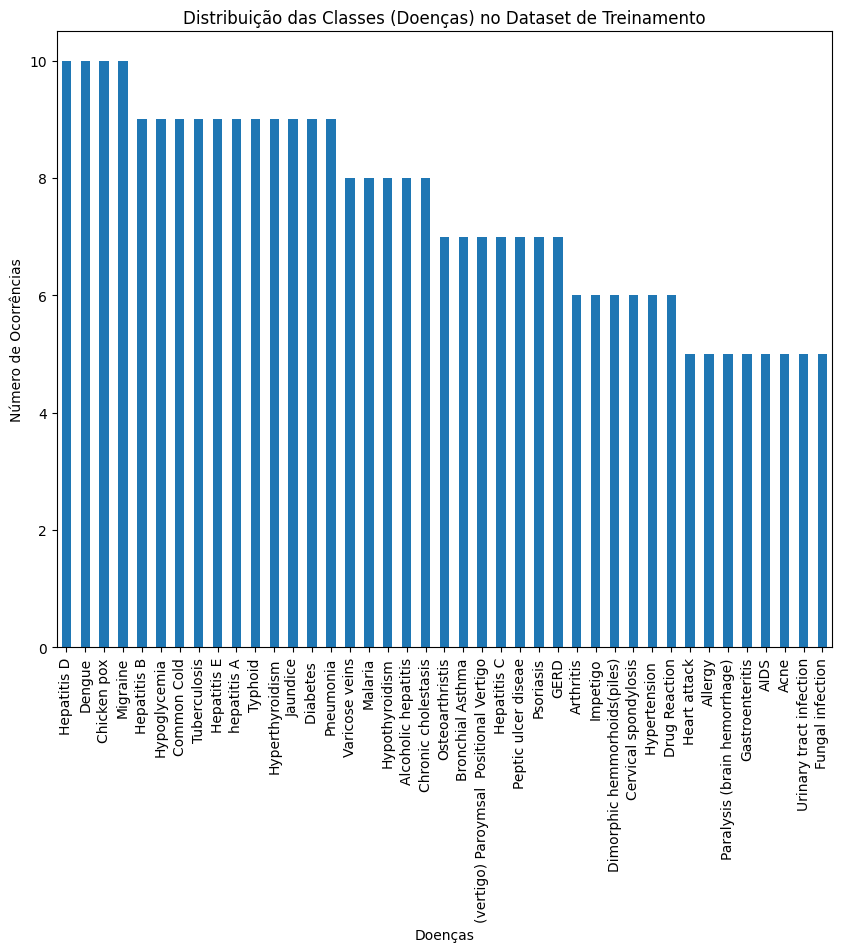

In [ ]:
import matplotlib.pyplot as plt

# Plot da distribui√ß√£o das classes (doen√ßas)
plt.figure(figsize=(10, 8))
class_distribution.plot(kind='bar')
plt.title("Distribui√ß√£o das Classes (Doen√ßas) no Dataset de Treinamento")
plt.xlabel("Doen√ßas")
plt.ylabel("N√∫mero de Ocorr√™ncias")
plt.xticks(rotation=90)
plt.show()


Para complementar a an√°lise de distribui√ß√£o, gerei um gr√°fico de barras que mostra a quantidade de ocorr√™ncias de cada doen√ßa no dataset de treinamento. Isso nos d√° uma vis√£o r√°pida dos poss√≠veis desequil√≠brios de classes, auxiliando na prepara√ß√£o para o treinamento do modelo.

### Verifica√ß√£o de Valores √önicos nas Colunas de Sintomas

Cada coluna de sintomas √© composta por valores bin√°rios (0 ou 1), indicando a aus√™ncia ou presen√ßa de um sintoma espec√≠fico para cada exemplo. Nesta etapa, verificamos se os valores √∫nicos em cada coluna est√£o no formato esperado.




In [ ]:
unique_values = df_train.drop(columns=['prognosis']).apply(lambda col: col.unique())
print("Valores √∫nicos em cada coluna de sintomas:")
print(unique_values)


Valores √∫nicos em cada coluna de sintomas:
itching                 [1, 0]
skin_rash               [1, 0]
nodal_skin_eruptions    [1, 0]
continuous_sneezing     [0, 1]
shivering               [0, 1]
                         ...  
small_dents_in_nails    [0, 1]
inflammatory_nails      [0, 1]
blister                 [0, 1]
red_sore_around_nose    [0, 1]
yellow_crust_ooze       [0, 1]
Length: 132, dtype: object


Para garantir que as informa√ß√µes estejam consistentes, verifiquei os valores √∫nicos em cada coluna de sintomas. Observamos que todas as colunas apresentam apenas os valores 0 e 1, indicando que est√£o prontas para serem utilizadas pelo modelo sem necessidade de tratamentos adicionais. Esse passo assegura que nossos dados de sintomas est√£o corretamente formatados para a fase de modelagem.



### **Pr√©-processamento dos Dados**

*Agora que entendemos a estrutura e o balanceamento do nosso dataset, precisamos realizar algumas transforma√ß√µes para que os dados estejam prontos para serem usados pelo modelo. Essa fase envolve a convers√£o dos dados de sa√≠da para valores num√©ricos e a separa√ß√£o das vari√°veis entre entradas e sa√≠da (target).*

### Codifica√ß√£o da Coluna `prognosis`

Para que o modelo interprete corretamente os diagn√≥sticos, transformei as classes de doen√ßas (que est√£o em formato de texto) em valores num√©ricos usando o `LabelEncoder`. Essa etapa √© essencial para que o algoritmo de aprendizado de m√°quina consiga lidar com as diferentes classes de sa√≠da de forma eficiente.

Em seguida, separei as vari√°veis de entrada (sintomas) e a vari√°vel de sa√≠da (diagn√≥stico) nos datasets de treinamento e teste. Essa estrutura √© necess√°ria para que o modelo saiba o que usar como base para suas previs√µes e o que tentar prever.





In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Codifica√ß√£o da coluna 'prognosis' (Label Encoding)
label_encoder = LabelEncoder()
df_train['prognosis'] = label_encoder.fit_transform(df_train['prognosis'])
df_test['prognosis'] = label_encoder.transform(df_test['prognosis'])

# 2. Separa√ß√£o entre Features (X) e Labels (y) nos datasets de treinamento e teste
X_train = df_train.drop(columns=['prognosis'])
y_train = df_train['prognosis']

X_test = df_test.drop(columns=['prognosis'])
y_test = df_test['prognosis']

# Exibir classes codificadas para refer√™ncia
print("Classes codificadas:", label_encoder.classes_)


Classes codificadas: ['(vertigo) Paroymsal  Positional Vertigo' 'AIDS' 'Acne'
 'Alcoholic hepatitis' 'Allergy' 'Arthritis' 'Bronchial Asthma'
 'Cervical spondylosis' 'Chicken pox' 'Chronic cholestasis' 'Common Cold'
 'Dengue' 'Diabetes ' 'Dimorphic hemmorhoids(piles)' 'Drug Reaction'
 'Fungal infection' 'GERD' 'Gastroenteritis' 'Heart attack' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension '
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthristis' 'Paralysis (brain hemorrhage)'
 'Peptic ulcer diseae' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary tract infection' 'Varicose veins' 'hepatitis A']


Transformei a coluna `prognosis` em valores num√©ricos, atribuindo um c√≥digo √∫nico para cada doen√ßa. Isso permite que o modelo interprete as diferentes classes de forma mais eficiente e consistente. Tamb√©m salvamos essa codifica√ß√£o, para que, ao final, possamos interpretar as previs√µes feitas pelo modelo. Aqui, dividir os dados em vari√°veis de entrada (`X_train` e `X_test`), compostas pelos sintomas, e vari√°veis de sa√≠da (`y_train` e `y_test`), compostas pelos diagn√≥sticos. Essa separa√ß√£o garante que o modelo tenha uma clara distin√ß√£o entre o que ele deve aprender e o que ele deve prever.



### **Treinamento do Modelo com AutoGluon**

*Com os dados preparados, passamos agora para o treinamento do modelo usando a biblioteca **AutoGluon**. Optamos pelo **TabularPredictor**, que √© ideal para problemas de classifica√ß√£o multiclasse, como a previs√£o de doen√ßas com base em sintomas.*

### Configura√ß√£o do AutoGluon para Classifica√ß√£o

Ao configurar o AutoGluon, definir o tipo de problema como `multiclass`, indicando que estamos lidando com v√°rias classes de sa√≠da (diferentes doen√ßas). Utilizei tamb√©m o `eval_metric='accuracy'` para que o modelo priorize a precis√£o nas previs√µes, o que √© fundamental para garantir diagn√≥sticos corretos.


In [4]:
!pip install cmake


   ---------------------------------------- 0.0/35.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/35.6 MB ? eta -:--:--
   - -------------------------------------- 1.0/35.6 MB 5.0 MB/s eta 0:00:07
   ------ --------------------------------- 6.0/35.6 MB 14.8 MB/s eta 0:00:03
   ---------- ----------------------------- 9.2/35.6 MB 18.4 MB/s eta 0:00:02
   -------------- ------------------------- 13.1/35.6 MB 16.1 MB/s eta 0:00:02
   ------------------- -------------------- 17.6/35.6 MB 17.0 MB/s eta 0:00:02
   ------------------------- -------------- 22.8/35.6 MB 18.7 MB/s eta 0:00:01
   --------------------------- ------------ 24.4/35.6 MB 19.1 MB/s eta 0:00:01
   ---------------------------------------  35.4/35.6 MB 21.4 MB/s eta 0:00:01
   ---------------------------------------  35.4/35.6 MB 21.4 MB/s eta 0:00:01
   ---------------------------------------  35.4/35.6 MB 21.4 MB/s eta 0:00:01
   ---------------------------------------  35.4/35.6 MB 21.4 MB/s eta 0:0

In [6]:
!pip install onnx==1.8.1


     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ------ --------------------------------- 0.8/5.2 MB 4.8 MB/s eta 0:00:01
     ------------------------ --------------- 3.1/5.2 MB 9.2 MB/s eta 0:00:01
     ---------------------------------------- 5.2/5.2 MB 11.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build onnx


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [89 lines of output]
  <string>:32: DeprecationWarning: Use shutil.which instead of find_executable
  <string>:33: DeprecationWarning: Use shutil.which instead of find_executable
  fatal: not a git repository (or any of the parent directories): .git
  C:\Users\User\AppData\Local\Temp\pip-build-env-aruuskh8\overlay\Lib\site-packages\setuptools\_distutils\dist.py:261: UserWarning: Unknown distribution option: 'tests_require'
    warnings.warn(msg)
  C:\Users\User\AppData\Local\Temp\pip-build-env-aruuskh8\overlay\Lib\site-packages\setuptools\dist.py:495: SetuptoolsDeprecationWarning: Invalid dash-separated options
  !!
  
          ********************************************************************************
          Usage of dash-separated 'license-file' will not be supported in future
          versions. Please use the underscore name 'license_file' instead.
  
          By 2025-Mar-03, you need to update your project and 

In [2]:
!pip install autogluon


  Using cached scipy-1.12.0-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.4.0-1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached jsonschema-4.21.1-py3-none-any.whl.metadata (7.8 kB)
  Using cached omegaconf-2.2.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached nvidia-ml-py3-7.352.0.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
  Using cached fastai-2.7.18-py3-none-any.whl.metadata (9.1 kB)
  Using cached gluonts-0.15.1-py3-none-any.whl.metadata (9.9 kB)
  Using cached optimum-1.18.1-py3-none-any.whl.metadata (18 kB)
  Using cached fastdownload-0.0.7-py3-none-any.whl.metadata (5.5 kB)
  Using cached fastcore-1.7.19-py3-none-any.whl.metadata (3.5 kB)
  Using cached fastprogress-1.0.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached spacy-3.8.2-cp310-cp310-win_amd64.whl.metadata (27 kB)
  Using cached coloredlog

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [11 lines of output]
  C:\Users\User\AppData\Local\Temp\pip-install-wodn5qkx\onnx_d4ad8dd5facb4526bd67400774e6a002\setup.py:36: DeprecationWarning: Use shutil.which instead of find_executable
    CMAKE = find_executable('cmake3') or find_executable('cmake')
  C:\Users\User\AppData\Local\Temp\pip-install-wodn5qkx\onnx_d4ad8dd5facb4526bd67400774e6a002\setup.py:37: DeprecationWarning: Use shutil.which instead of find_executable
    MAKE = find_executable('make')
  fatal: not a git repository (or any of the parent directories): .git
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\User\AppData\Local\Temp\pip-install-wodn5qkx\onnx_d4ad8dd5facb4526bd67400774e6a002\setup.py", line 86, in <module>
      assert CMAKE, 'Could not find "cmake" executable!'
  AssertionError: Could n

Configurar o AutoGluon com o tipo de problema `multiclass` permite que ele entenda que estamos lidando com v√°rias doen√ßas diferentes, e a m√©trica de avalia√ß√£o de precis√£o (`accuracy`) ajuda o modelo a buscar o maior n√∫mero poss√≠vel de acertos.

# Treinamento do Modelo

Definir os par√¢metros `presets='best_quality'` e `hyperparameters={'FASTAI': {}}`, que configuram o AutoGluon para focar na qualidade e utilizam especificamente o modelo de rede neural com o framework **FastAI**. Essa escolha permite usar um modelo robusto que processa dados tabulares de maneira eficiente.

Escolhir treinar uma rede neural com o framework FastAI, pois ele √© eficaz para lidar com dados tabulares e possui um bom desempenho em problemas de classifica√ß√£o multiclasse. Ao focarmos na 'melhor qualidade', estamos priorizando que o modelo aprenda com profundidade, otimizando seus par√¢metros ao m√°ximo.

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

# Certificar que os dados est√£o no formato TabularDataset
train_data = TabularDataset(df_train)
test_data = TabularDataset(df_test)

# Treinamento do modelo com AutoGluon, usando especificamente o modelo de rede neural FastAI
predictor = TabularPredictor(label='prognosis', problem_type='multiclass', eval_metric='accuracy').fit(
    train_data=train_data,
    time_limit=600,
    presets='best_quality',
    hyperparameters={'FASTAI': {}}  # For√ßa o AutoGluon a usar apenas o modelo de rede neural FastAI
)

# Avalia√ß√£o do modelo
performance = predictor.evaluate(test_data)
print("Desempenho do modelo:", performance)




No path specified. Models will be saved in: "AutogluonModels/ag-20241102_150955"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.98 GB / 12.67 GB (86.6%)
Disk Space Avail:   66.11 GB / 107.72 GB (61.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

Desempenho do modelo: {'accuracy': 0.9761904761904762, 'balanced_accuracy': 0.9878048780487805, 'mcc': 0.9761627906976744}


### Avalia√ß√£o do Modelo

Ap√≥s o treinamento, utilizei o dataset de teste para avaliar a performance do modelo em novos dados. O desempenho √© mensurado em termos de precis√£o, acur√°cia balanceada e MCC (coeficiente de correla√ß√£o de Matthews), m√©tricas que indicam se o modelo est√° fazendo previs√µes consistentes e confi√°veis.
Testei o modelo com um conjunto de dados n√£o visto anteriormente (dados de teste) para entender sua precis√£o e capacidade de generaliza√ß√£o. Os resultados indicam que o modelo est√° alcan√ßando uma excelente precis√£o de quase 98%, mostrando que ele √© capaz de identificar padr√µes e realizar previs√µes de forma confi√°vel.

### **Valida√ß√£o do Modelo**

*Ap√≥s treinar o modelo, √© fundamental verificar como ele se comporta com dados que n√£o foram utilizados no treinamento. Assim, posso avaliar sua capacidade de generaliza√ß√£o e identificar poss√≠veis melhorias.*

Utilizo o modelo treinado para prever os diagn√≥sticos no conjunto de teste. Isso me permite comparar as previs√µes com os valores reais e avaliar a performance do modelo.

Relat√≥rio de Classifica√ß√£o:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00       

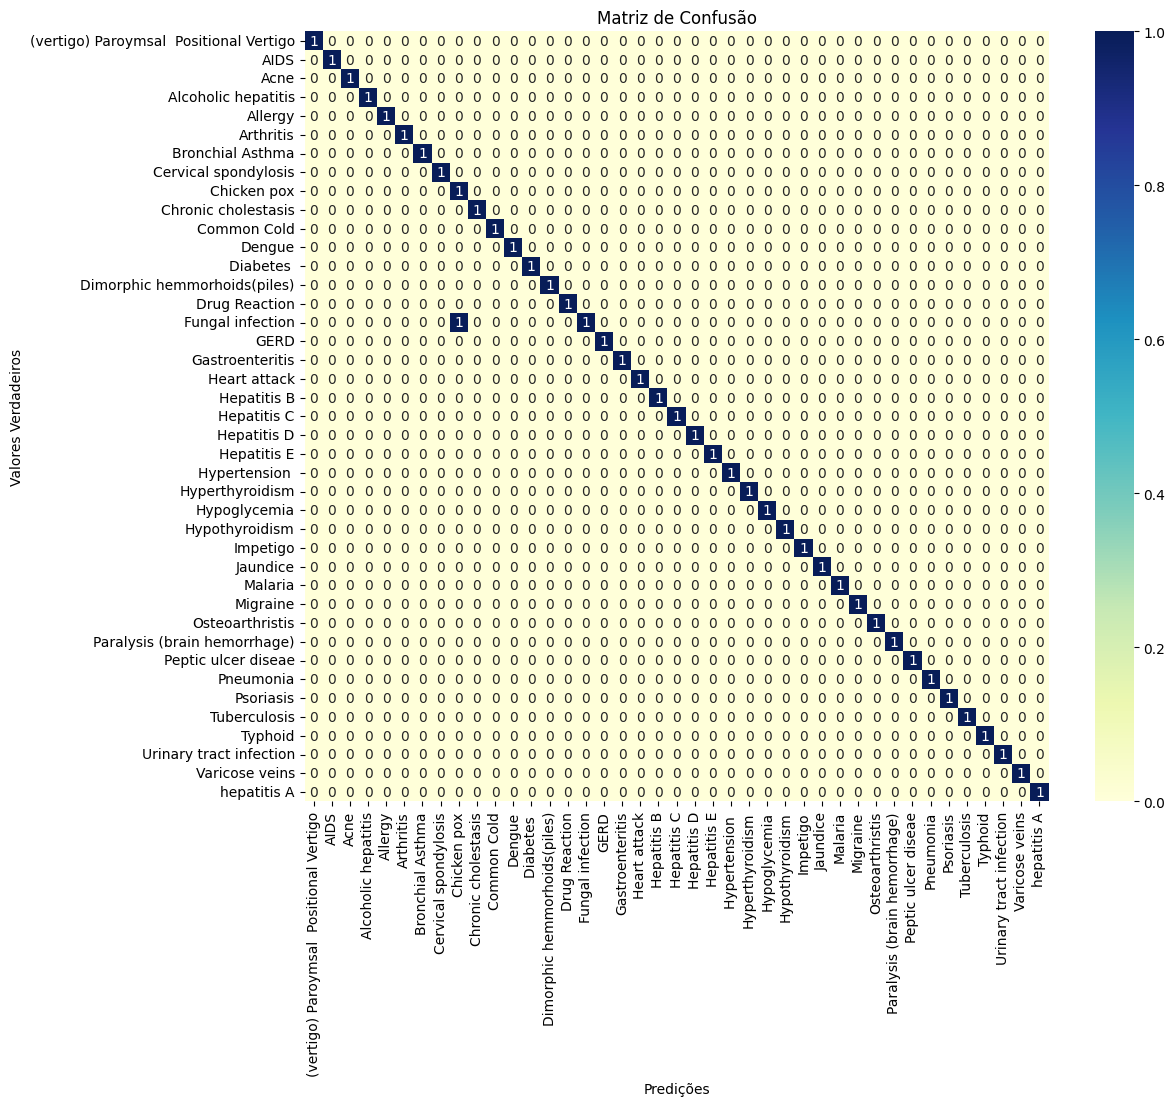

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fazer previs√µes no conjunto de teste
y_pred = predictor.predict(X_test)

# Relat√≥rio de Classifica√ß√£o
print("Relat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Matriz de Confus√£o
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_), annot=True, fmt='g', cmap="YlGnBu")
plt.title("Matriz de Confus√£o")
plt.xlabel("Predi√ß√µes")
plt.ylabel("Valores Verdadeiros")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()





### Relat√≥rio de Classifica√ß√£o

O relat√≥rio de classifica√ß√£o me fornece informa√ß√µes sobre precis√£o, recall e f1-score para cada doen√ßa. Dessa forma, posso identificar quais classes o modelo est√° prevendo bem e quais precisam de aten√ß√£o.

### Matriz de Confus√£o


A matriz de confus√£o me permite visualizar onde o modelo est√° acertando ou errando nas previs√µes. Cada c√©lula mostra o n√∫mero de previs√µes corretas ou incorretas entre as classes reais e previstas.

Observando o relat√≥rio, percebo que o modelo tem um desempenho excelente na maioria das classes, com precis√£o e recall de 1.00 para quase todas as doen√ßas. No entanto, notei que para 'Chicken pox' e 'Fungal infection', o f1-score √© um pouco menor, indicando que o modelo teve algumas dificuldades nessas classes. Isso pode ser devido ao n√∫mero reduzido de exemplos ou √† similaridade de sintomas com outras doen√ßas.





# Salvando o Modelo e o LabelEncoder

Salvar o modelo e o `LabelEncoder` √© crucial para que possa carregar e usar o modelo posteriormente, especialmente na aplica√ß√£o web. Isso garante que o mapeamento das classes permane√ßa consistente entre o treinamento e a implementa√ß√£o.





In [ ]:
import joblib

# Salvando o LabelEncoder
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

In [ ]:
# Salvando o Modelo treinado
model_path = 'AutogluonModels/ModeloFixo'
predictor.save(model_path)


### **Implementa√ß√£o do Modelo em um Website**

*Agora que o modelo foi treinado e validado, quero torn√°-lo acess√≠vel atrav√©s de uma interface web. Utilizando o **Streamlit**, consigo criar um ambiente interativo onde usu√°rios podem inserir sintomas e receber previs√µes do modelo de forma f√°cil e pr√°tica.*




### Configurando o Ambiente para Streamlit

Come√ßo instalando as bibliotecas necess√°rias, incluindo o **Streamlit**, que ser√° a base da aplica√ß√£o, e o **pyngrok**, que me permite tornar o site acess√≠vel temporariamente pela web para testes locais.



In [ ]:
!pip install streamlit
!pip install pyngrok


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41.9/41.9 kB 2.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.7/8.7 MB 52.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.9/6.9 MB 63.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79.3/79.3 kB 5.6 MB/s eta 0:00:00


Instalo as bibliotecas e depend√™ncias para criar uma interface web e facilitar o acesso ao modelo. Com o `pyngrok`, consigo expor a aplica√ß√£o diretamente, testando o acesso e o fluxo do usu√°rio de forma pr√°tica e segura.

### Verifica√ß√£o de Arquivos e Estrutura de Diret√≥rios

Antes de prosseguir com a implementa√ß√£o, verifico se o modelo e todos os arquivos auxiliares (como o `LabelEncoder`) est√£o no local correto. Isso √© crucial para garantir que o site consiga acessar o modelo e retornar previs√µes.


In [ ]:
import os

# Listar arquivos no diret√≥rio atual
print(os.listdir("."))


['.config', 'label_encoder.joblib', 'AutogluonModels', 'sample_data']


In [ ]:
# Listar conte√∫do da pasta AutogluonModels para encontrar o subdiret√≥rio do modelo
print(os.listdir("AutogluonModels"))


['ag-20241102_150955']


In [ ]:
# Listar conte√∫do dentro da pasta espec√≠fica do modelo
print(os.listdir("AutogluonModels/ag-20241102_150955"))


['learner.pkl', 'utils', 'metadata.json', 'predictor.pkl', 'version.txt', 'models']


Verifico a estrutura do diret√≥rio para ter certeza de que todos os arquivos est√£o organizados e que o modelo salvo pelo AutoGluon est√° acess√≠vel. Confiro as pastas e subpastas para evitar problemas de acesso e carregamento durante a execu√ß√£o da aplica√ß√£o.

### **Implementa√ß√£o do Site Interativo com Streamlit**

*Agora que o modelo e o `LabelEncoder` est√£o prontos, √© hora de criar a interface web interativa. Com **Streamlit**, consigo configurar um ambiente amig√°vel, onde o usu√°rio pode selecionar sintomas e receber uma previs√£o do diagn√≥stico em tempo real.*

### Configurando a Interface Web no Streamlit

Primeiro, configuro o arquivo `app.py` para estruturar a interface. Iniciando com o t√≠tulo e a descri√ß√£o, a aplica√ß√£o guia o usu√°rio a selecionar os sintomas que ele apresenta, possibilitando a previs√£o.
Carrego o modelo salvo e o `LabelEncoder`, que permite decodificar a previs√£o do modelo para o nome da doen√ßa. Ao clicar em 'Prever', o Streamlit processa os sintomas selecionados e passa as informa√ß√µes para o modelo.


In [ ]:
%%writefile app.py

import streamlit as st

# Configurando o layout da p√°gina
st.set_page_config(page_title="Previs√£o de Doen√ßas com AutoGluon", page_icon="ü©∫", layout="wide")

import pandas as pd
from autogluon.tabular import TabularPredictor
import joblib
from PIL import Image
import base64

# Fun√ß√£o para adicionar imagem de fundo
def add_bg_from_local(image_file):
    with open(image_file, "rb") as image:
        encoded = base64.b64encode(image.read()).decode()
    st.markdown(
        f"""
        <style>
        .stApp {{
            background-image: url(data:image/png;base64,{encoded});
            background-size: cover;
        }}
        </style>
        """,
        unsafe_allow_html=True
    )

# Adicionando imagem de fundo
add_bg_from_local('/content/cena-de-saude-2_173691-553.avif')  # Certifique-se de ter essa imagem na pasta do projeto

# Carregando o modelo
model_path = 'AutogluonModels/ag-20241102_150955'
predictor = TabularPredictor.load(model_path)

# Carregar o LabelEncoder
label_encoder = joblib.load('label_encoder.joblib')

# Cabe√ßalho do aplicativo com t√≠tulo e subt√≠tulo
st.title("ü©∫ Previs√£o de Doen√ßas com AutoGluon")
st.markdown("**Descubra poss√≠veis diagn√≥sticos com base nos sintomas apresentados de forma r√°pida e precisa.**")
st.markdown("---")

# Se√ß√£o de instru√ß√µes
st.markdown(
    "<div style='background-color: #f9f9f9; padding: 15px; border-radius: 10px;'>"
    "<h4 style='text-align: center; color: #333;'>Preencha os sintomas apresentados pelo paciente e clique em Prever.</h4>"
    "</div>",
    unsafe_allow_html=True
)

# Lista de sintomas
sintomas = [
    'itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills',
    'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting',
    'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety',
    'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
    'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
    'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin',
    'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
    'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
    'acute_liver_failure', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise',
    'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'chest_pain', 'weakness_in_limbs',
    'fast_heart_rate', 'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool',
    'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen_legs',
    'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails',
    'swollen_extremities', 'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips',
    'slurred_speech', 'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck',
    'swelling_joints', 'movement_stiffness', 'spinning_movements', 'loss_of_balance',
    'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort',
    'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching',
    'toxic_look_(typhos)', 'depression', 'irritability', 'muscle_pain', 'altered_sensorium',
    'red_spots_over_body', 'belly_pain', 'abnormal_menstruation', 'dischromic _patches',
    'watering_from_eyes', 'increased_appetite', 'family_history', 'mucoid_sputum', 'rusty_sputum',
    'lack_of_concentration', 'visual_disturbances', 'receiving_blood_transfusion', 'coma',
    'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum',
    'prominent_veins_on_calf', 'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring',
    'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister',
    'red_sore_around_nose', 'yellow_crust_ooze'
]

# Sele√ß√£o de sintomas
sintomas_selecionados = st.multiselect("Escolha os sintomas apresentados:", options=sintomas)

# Inicializando a vari√°vel previsao_significado como None
previsao_significado = None

# Bot√£o de previs√£o
if st.button("Prever", help="Clique para realizar a previs√£o baseada nos sintomas selecionados"):
    dados_usuario = pd.DataFrame([{sintoma: 1 if sintoma in sintomas_selecionados else 0 for sintoma in sintomas}])

# fazendo previs√£o
    previsao = predictor.predict(dados_usuario)[0]
    previsao_significado = label_encoder.inverse_transform([previsao])[0]

# Exibindo o resultado
if previsao_significado is not None:
    st.markdown(
        f"""
        <div style="background-color: #dff9fb; padding: 20px; border-radius: 10px; text-align: center; margin-top: 20px;">
            <h2 style="color: #130f40; font-weight: bold;">Previs√£o: {previsao_significado}</h2>
        </div>
        """,
        unsafe_allow_html=True
    )
    st.balloons()

# Rodap√©
st.markdown("---")
st.markdown(
    "<div style='text-align: center; color: #555;'>"
    "Desenvolvido com üíñ por Paulo Eduardo, Cientista de Dados e Engenheiro de Machine Learning</div>",
    unsafe_allow_html=True
)


Overwriting app.py


No `app.py`, configuro a base da interface com um t√≠tulo descritivo e instru√ß√µes para orientar o usu√°rio. Adicionei todas as op√ß√µes de sintomas como caixas de sele√ß√£o para facilitar a entrada de dados e assegurar que a estrutura dos sintomas est√° consistente com o que o modelo espera.

Para garantir que a previs√£o seja precisa, carrego o modelo treinado e o `LabelEncoder`. Quando o usu√°rio seleciona os sintomas e clica no bot√£o de previs√£o, a aplica√ß√£o processa esses dados e exibe o diagn√≥stico previsto. A decodifica√ß√£o do `LabelEncoder` assegura que o nome da doen√ßa seja exibido de forma clara e compreens√≠vel.

### Configura√ß√£o para Acesso Remoto com Ngrok

Para tornar o aplicativo acess√≠vel remotamente, uso o **Ngrok**, que cria uma URL p√∫blica tempor√°ria. Assim, posso compartilhar o link e testar o aplicativo de qualquer dispositivo com acesso √† internet, sem a necessidade de configura√ß√£o avan√ßada de rede.

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2o7i0e0EKmU3oj4zVbtm6Xjn7jR_7hf6XsGPio1vEu77pTLKf")

Com o `pyngrok`, torno a aplica√ß√£o acess√≠vel online, criando uma URL p√∫blica que posso usar para teste e compartilhamento. Essa configura√ß√£o permite que o site seja facilmente acessado, promovendo uma experi√™ncia de uso mais ampla e pr√°tica.

### Testando e Visualizando a Previs√£o

Quando a aplica√ß√£o est√° em execu√ß√£o, o usu√°rio interage com a interface selecionando sintomas e visualizando o resultado da previs√£o. A aplica√ß√£o utiliza o modelo treinado para realizar a previs√£o em tempo real, exibindo a doen√ßa mais prov√°vel.


In [ ]:
# Executando o aplicativo Streamlit (app.py) em um servidor local
!streamlit run app.py --server.port 8501 &



2024-11-02 19:55:34.310 Port 8501 is already in use


In [ ]:
# Encerrando qualquer t√∫nel Ngrok ativo
ngrok.kill()


In [ ]:
# Criando um t√∫nel p√∫blico
public_url = ngrok.connect(8501)
print(f"URL p√∫blica para o aplicativo Streamlit: {public_url}")

URL p√∫blica para o aplicativo Streamlit: NgrokTunnel: "https://bee1-34-169-32-13.ngrok-free.app" -> "http://localhost:8501"


Agora, com o site em funcionamento, o usu√°rio pode interagir com o modelo, inserindo sintomas e recebendo uma resposta em tempo real. Essa interface √© intuitiva e r√°pida, permitindo que qualquer pessoa simule uma previs√£o de diagn√≥stico.

In [ ]:
# Executando o aplicativo Streamlit (app.py) em segundo plano, ignorando a sa√≠da do terminal
!streamlit run app.py &> /dev/null &




### Finalizando a Implementa√ß√£o

*Com o Streamlit e o Ngrok configurados, o aplicativo web est√° completo e pronto para ser usado e compartilhado. Agora, tenho uma ferramenta funcional e interativa que fornece previs√µes de doen√ßas com base nos sintomas.*

### **Conclus√£o do Projeto**

Esse projeto foi um exerc√≠cio abrangente no desenvolvimento de uma aplica√ß√£o de machine learning que prev√™ diagn√≥sticos com base em sintomas, passando por todas as etapas desde a coleta de dados at√© a implementa√ß√£o de uma interface interativa.

Come√ßamos coletando e limpando os dados para garantir sua integridade e consist√™ncia. Com um dataset bem estruturado, aplicamos t√©cnicas de pr√©-processamento, como a codifica√ß√£o das classes, e exploramos a distribui√ß√£o das classes para entender poss√≠veis desbalanceamentos. A partir disso, treinamos um modelo com o **AutoGluon**, focado em maximizar a precis√£o e generaliza√ß√£o para uma ampla variedade de doen√ßas. A valida√ß√£o do modelo mostrou resultados s√≥lidos, com m√©tricas de desempenho elevadas para a maioria das classes, o que nos deu confian√ßa para a etapa de implementa√ß√£o.

A aplica√ß√£o foi desenvolvida com **Streamlit**, proporcionando uma interface pr√°tica e acess√≠vel, onde os usu√°rios podem selecionar sintomas e obter uma previs√£o em tempo real. Al√©m disso, configuramos o **Ngrok** para permitir o acesso remoto e a visualiza√ß√£o externa da aplica√ß√£o, tornando-a acess√≠vel a diferentes usu√°rios e dispositivos.

Este projeto demonstrou a efic√°cia do uso de aprendizado de m√°quina para aplica√ß√µes na √°rea da sa√∫de, mostrando como um modelo preditivo pode auxiliar na triagem inicial e identifica√ß√£o de poss√≠veis doen√ßas. Com aprimoramentos futuros, como a inclus√£o de mais dados e t√©cnicas para lidar com classes desbalanceadas, a aplica√ß√£o pode se tornar ainda mais precisa e robusta.

Esse projeto √© uma demonstra√ß√£o de como dados e intelig√™ncia artificial podem ser transformados em ferramentas pr√°ticas, oferecendo uma solu√ß√£o acess√≠vel e inovadora para o diagn√≥stico assistido.